In [52]:
import matplotlib.pyplot as plt
import os


# Define a function to read data from a file
def read_data(filepath):
    rtt = []
    avg = []
    stddev = []
    with open(filepath, "r") as file:
        next(file)  # Skip header
        for line in file:
            data = line.strip().split("\t")
            rtt.append(float(data[0]))
            avg.append(float(data[1]))
            stddev.append(float(data[4]))
    return rtt, avg, stddev


# List of files with path
file_path = (
    "/home/rijul/ns-allinone-3.36.1/ns-3.36.1/examples/results/TCPNewReno-fct-stats"
)
files = [
    "Droptail-0-4.txt",
    "Droptail-5-9.txt",
    "Droptail-10-23.txt",
    "Droptail-24-28.txt",
    "Droptail-29-31.txt",
    "Droptail-32-52.txt",
    "Droptail-53-56.txt",
    "Droptail-57-59.txt",
    "Threshold15-0-4.txt",
    "Threshold15-5-9.txt",
    "Threshold15-10-23.txt",
    "Threshold15-24-28.txt",
    "Threshold15-29-31.txt",
    "Threshold15-32-52.txt",
    "Threshold15-53-56.txt",
    "Threshold15-57-59.txt",
]

# Create subplots
data = []
# Loop through files and plot data
for filename in files:
    filepath = os.path.join(file_path, filename)
    rtt, avg, stddev = read_data(filepath)

    if "Droptail" in filename:
        data.append(
            {
                "rtt": rtt,
                "avg": avg,
                "stddev": stddev,
                "label": "Droptail",
                "id": int(filename.replace("Droptail-", "").replace(".txt", "").split("-")[0]),
                "set_name": filename.replace("Droptail-", "").replace(".txt", ""),
            }
        )
    else:
        data.append(
            {
                "rtt": rtt,
                "avg": avg,
                "stddev": stddev,
                "label": "Threshold",
                "id": int(
                    filename.replace("Threshold15-", "")
                    .replace(".txt", "")
                    .split("-")[0]
                ),
                "set_name": filename.replace("Threshold15-", "").replace(".txt", ""),
            }
        )

In [53]:
data

[{'rtt': [10.0,
   15.0,
   20.0,
   25.0,
   30.0,
   35.0,
   40.0,
   45.0,
   50.0,
   55.0,
   60.0,
   65.0,
   70.0,
   75.0,
   80.0,
   85.0,
   90.0,
   95.0,
   100.0,
   105.0,
   110.0,
   115.0,
   120.0,
   125.0,
   130.0,
   135.0,
   140.0,
   145.0,
   150.0,
   155.0,
   160.0,
   165.0,
   170.0,
   175.0,
   180.0,
   185.0,
   190.0,
   195.0,
   200.0,
   205.0,
   210.0,
   215.0,
   220.0,
   225.0,
   230.0,
   235.0,
   240.0,
   245.0,
   250.0,
   255.0,
   260.0,
   265.0,
   270.0,
   275.0,
   280.0,
   285.0,
   290.0,
   295.0,
   300.0],
  'avg': [2206.36,
   2201.87,
   2200.19,
   2198.71,
   2199.76,
   2203.28,
   2201.42,
   2207.11,
   2205.34,
   2206.95,
   2197.91,
   2206.33,
   2209.4,
   2204.28,
   2203.59,
   2201.56,
   2204.0,
   2202.71,
   2207.94,
   2199.03,
   2204.23,
   2203.35,
   2203.72,
   2202.44,
   2203.61,
   2198.93,
   2197.0,
   2206.37,
   2198.16,
   2202.8,
   2200.83,
   2198.17,
   2197.91,
   2207.22,
   2197.3

In [54]:
data = sorted(data, key=lambda x: x["id"])

In [55]:
data

[{'rtt': [10.0,
   15.0,
   20.0,
   25.0,
   30.0,
   35.0,
   40.0,
   45.0,
   50.0,
   55.0,
   60.0,
   65.0,
   70.0,
   75.0,
   80.0,
   85.0,
   90.0,
   95.0,
   100.0,
   105.0,
   110.0,
   115.0,
   120.0,
   125.0,
   130.0,
   135.0,
   140.0,
   145.0,
   150.0,
   155.0,
   160.0,
   165.0,
   170.0,
   175.0,
   180.0,
   185.0,
   190.0,
   195.0,
   200.0,
   205.0,
   210.0,
   215.0,
   220.0,
   225.0,
   230.0,
   235.0,
   240.0,
   245.0,
   250.0,
   255.0,
   260.0,
   265.0,
   270.0,
   275.0,
   280.0,
   285.0,
   290.0,
   295.0,
   300.0],
  'avg': [2206.36,
   2201.87,
   2200.19,
   2198.71,
   2199.76,
   2203.28,
   2201.42,
   2207.11,
   2205.34,
   2206.95,
   2197.91,
   2206.33,
   2209.4,
   2204.28,
   2203.59,
   2201.56,
   2204.0,
   2202.71,
   2207.94,
   2199.03,
   2204.23,
   2203.35,
   2203.72,
   2202.44,
   2203.61,
   2198.93,
   2197.0,
   2206.37,
   2198.16,
   2202.8,
   2200.83,
   2198.17,
   2197.91,
   2207.22,
   2197.3

In [56]:
def plot_avg(data):
    # Create a dictionary to store plots for each id
    id_to_plots = {}
    fig, ax = plt.subplots(2, 4, figsize=(16, 8))
    i = 0
    for item in data:
        rtt = item["rtt"]
        avg = item["avg"]
        label = item["label"]
        set_name = item["set_name"]

        # Plot rtt vs avg
        ax[i // 4, i % 4].plot(rtt, avg, label=label)
        ax[i // 4, i % 4].set_xlabel("RTT (ms)")
        ax[i // 4, i % 4].set_ylabel("AFCT")
        ax[i // 4, i % 4].set_title(f"RTT vs AFCT: Set {set_name}")
        ax[i // 4, i % 4].legend()
        if (label == "Threshold"):
            i = i + 1

    # Loop through all created plots and display them
    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

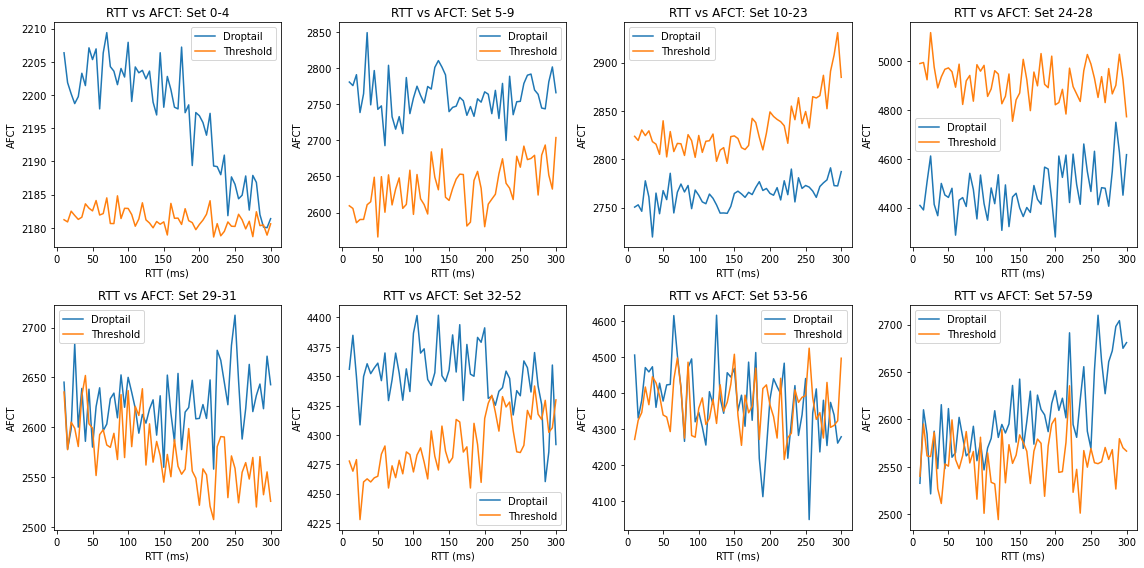

In [57]:
plot_avg(data)

In [58]:
def plot_stddev(data):
    # Create a dictionary to store plots for each id
    id_to_plots = {}
    fig, ax = plt.subplots(2, 4, figsize=(16, 8))
    i = 0
    for item in data:
        rtt = item["rtt"]
        avg = item["stddev"]
        label = item["label"]
        set_name = item["set_name"]

        # Plot rtt vs avg
        ax[i // 4, i % 4].plot(rtt, avg, label=label)
        ax[i // 4, i % 4].set_xlabel("RTT (ms)")
        ax[i // 4, i % 4].set_ylabel("SDFCT")
        ax[i // 4, i % 4].set_title(f"RTT vs SDFCT: Set {set_name}")
        ax[i // 4, i % 4].legend()
        if label == "Threshold":
            i = i + 1

    # Loop through all created plots and display them
    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

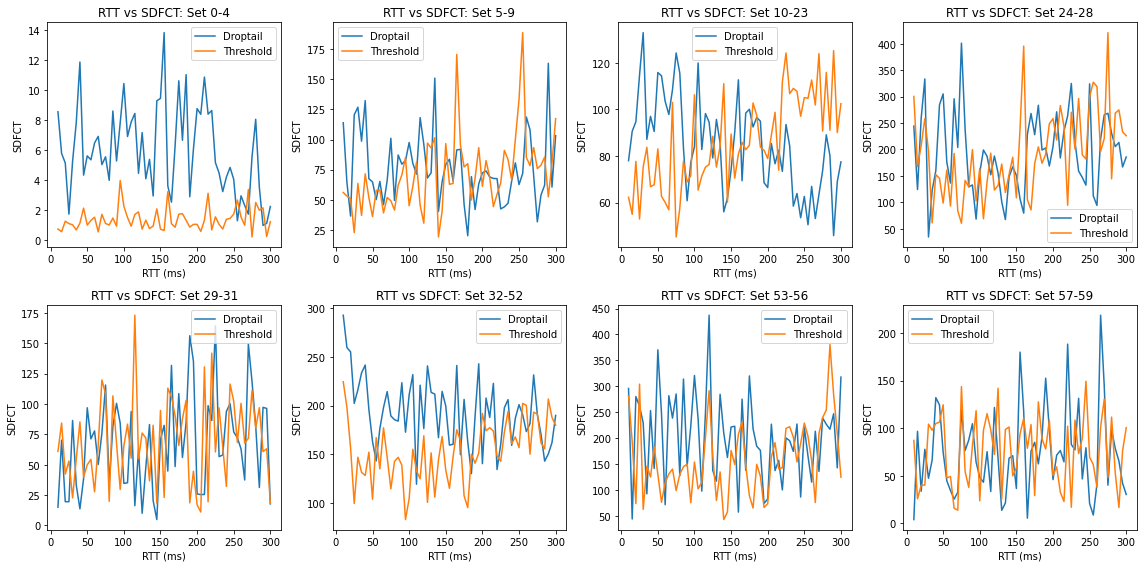

In [59]:
plot_stddev(data)